In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [23]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([2.13689912, 2.32634483, 1.89082654, 1.02608272, 1.29247032,
       2.2572926 , 1.97630549, 1.61173357, 2.24356621, 2.50012317])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [24]:
norm_rv.cdf(3)

0.9772498680518208

Построим график функции распределения:

Text(0.5, 0, '$x$')

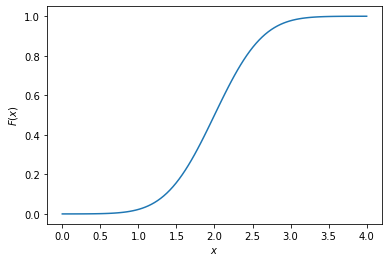

In [25]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [26]:
norm_rv.pdf(3)

0.10798193302637613

Построим график функции плотности вероятности:

Text(0.5, 0, '$x$')

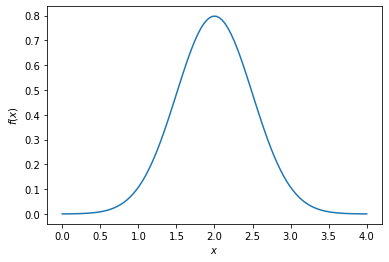

In [27]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [28]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.93456146, 3.95575395, 3.49808885, 3.60132662, 3.77764433,
       3.88130809, 1.92124681, 1.07110432, 3.06356558, 2.62459949])

А так — вычислять значения функций распределения и плотностей:

Text(0.5, 0, '$x$')

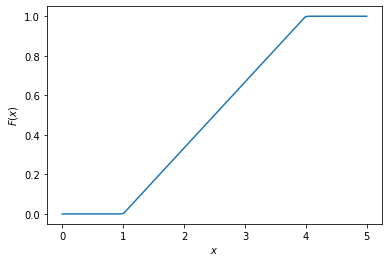

In [29]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

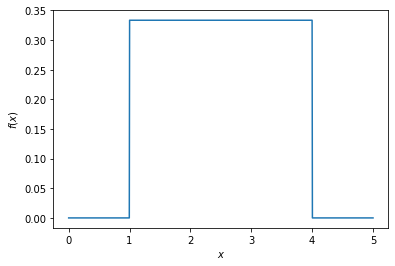

In [30]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [31]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [32]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([16, 15, 15, 13, 16, 15, 14, 17, 12, 16])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

Text(0.5, 0, '$x$')

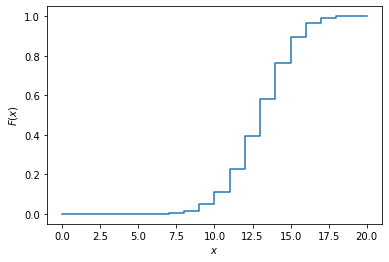

In [33]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

Text(0.5, 0, '$x$')

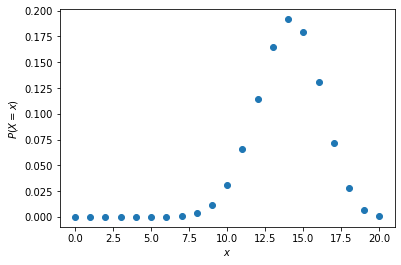

In [34]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

Text(0.5, 0, '$x$')

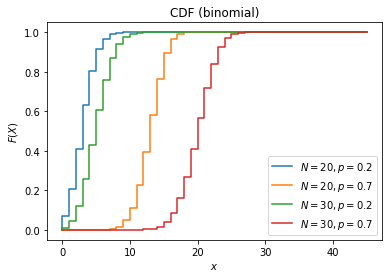

In [35]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

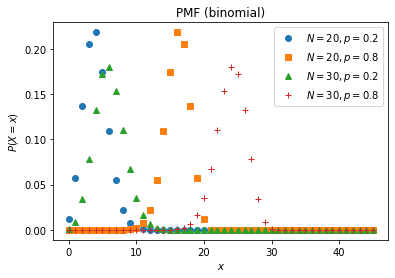

In [36]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [37]:
poisson_rv = sts.poisson(5)
poisson_rv.rvs(10)

array([4, 5, 4, 4, 3, 2, 3, 4, 3, 5])

In [69]:
mp = sts.poisson(3)
print('cdf = ', mp.cdf(5))
print('pmf = ', mp.pmf(5) + mp.pmf(6) + mp.pmf(15) + mp.pmf(7) + mp.pmf(8) + mp.pmf(9) + mp.pmf(10) + mp.pmf(11) + mp.pmf(12) + mp.pmf(13) + mp.pmf(14))


cdf =  0.9160820579686966
pmf =  0.1847366313960572


Text(0.5, 0, '$x$')

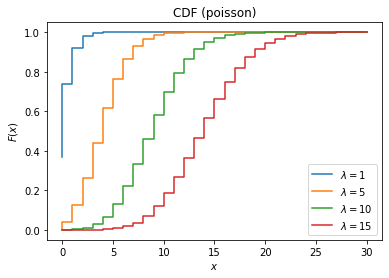

In [17]:
x = np.linspace(0,30,31)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

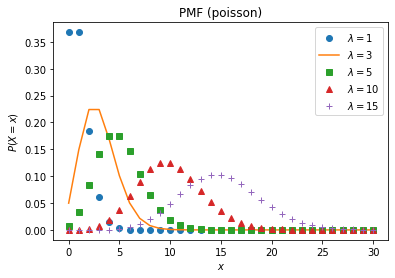

In [18]:
x = np.linspace(0,30,31)

symbols = iter(['o', '-', 's', '^', '+'])
for l in [1, 3, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 20, p=probabilities)

array([ 5, 12, 12, 12,  5, 12,  5,  5,  5,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы:

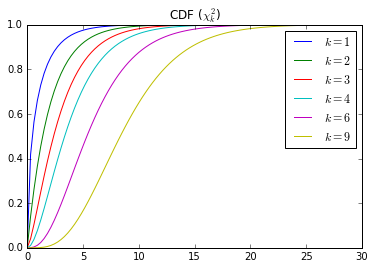

In [20]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

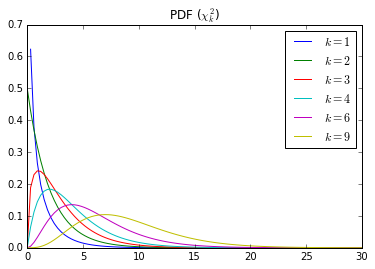

In [21]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html